Download Little Women Book, from Gutenberg

In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

def get_book_clean_tokens(book_id):
    # Example book id for Little Women on Project Gutenberg
    url = f'http://www.gutenberg.org/files/{book_id}/{book_id}-0.txt'

    try:
        # Get the book text from the URL
        response = requests.get(url)
        response.raise_for_status()

        # Extract text from the HTML content
        soup = BeautifulSoup(response.text, 'html.parser')
        book_text = soup.get_text()

        # Tokenize the text using NLTK
        tokens = word_tokenize(book_text)

        # Remove punctuation and convert to lowercase
        tokens = [word.lower() for word in tokens if word.isalnum()]

        # Remove stop words
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

        return tokens

    except requests.exceptions.RequestException as e:
        print(f'Error: {e}')
        return None

# Use the Project Gutenberg book id for Little Women ID: 37106
book_tokens = get_book_clean_tokens('37106')

if book_tokens:
    # Print the first 10 tokens as an example
    print(book_tokens[:10])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['ï', 'project', 'gutenberg', 'ebook', 'little', 'women', 'louisa', 'alcott', 'ebook', 'use']


Count wh, words

In [ ]:
def count_wh_words(tokens):
    # Count words that start with "wh"
    wh_words = [word for word in tokens if word.startswith("wh")]
    return len(wh_words)

# Use the Project Gutenberg book id for Little Women
book_tokens = get_book_clean_tokens('37106')

if book_tokens:

    # Count and print the number of words that start with "wh"
    wh_word_count = count_wh_words(book_tokens)
    print(f"Number of words that start with 'wh': {wh_word_count}")

Number of words that start with 'wh': 353


Frequency distribution of top 10 words

Top 10 words in the book:
jo: 1409
one: 902
said: 841
little: 769
meg: 700
amy: 663
laurie: 611
like: 588
would: 533
beth: 492


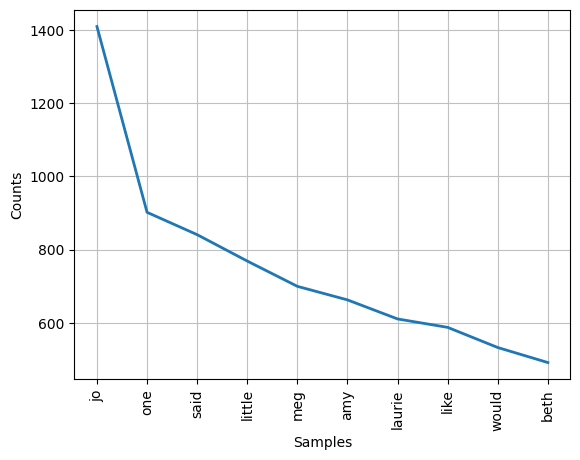

In [ ]:
from nltk import FreqDist
import string
import matplotlib.pyplot as plt

def calculate_word_frequency(tokens):
    # Calculate word frequency distribution
    freq_dist = FreqDist(tokens)
    return freq_dist

def print_top_words_with_frequency(freq_dist, n=10):
    # Print the top n words and their frequencies
    print(f"Top {n} words in the book:")
    for word, frequency in freq_dist.most_common(n):
        print(f"{word}: {frequency}")

def plot_frequency_distribution(freq_dist, n=30):
    # Plot the frequency distribution
    freq_dist.plot(n, cumulative=False)
    plt.show()

if book_tokens:
    # Calculate word frequency distribution
    book_freq_dist = calculate_word_frequency(book_tokens)

    # Print the top 10 words and their frequencies
    print_top_words_with_frequency(book_freq_dist, n=10)

    # Plot the frequency distribution
    plot_frequency_distribution(book_freq_dist, n=10)

Explore senses of ambigous words, using wordnet

In [ ]:
from nltk.corpus import wordnet as wn
nltk.download('wordnet')
home = 'home'

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
home_synsets = wn.synsets(home)
print('Synsets/Senses of Home:', home_synsets, '\n\n')

Synsets/Senses of Home: [Synset('home.n.01'), Synset('dwelling.n.01'), Synset('home.n.03'), Synset('home_plate.n.01'), Synset('base.n.14'), Synset('home.n.06'), Synset('home.n.07'), Synset('family.n.01'), Synset('home.n.09'), Synset('home.v.01'), Synset('home.v.02'), Synset('home.a.01'), Synset('home.a.02'), Synset('home.s.03'), Synset('home.r.01'), Synset('home.r.02'), Synset('home.r.03')] 




In [ ]:
for synset in home_synsets:
 print(synset, ': ')
 print('Definition: ', synset.definition())
 print('Lemmas/Synonymous words: ', synset.lemma_names())
 print('Example: ', synset.examples(), '\n')

Synset('home.n.01') : 
Definition:  where you live at a particular time
Lemmas/Synonymous words:  ['home', 'place']
Example:  ['deliver the package to my home', "he doesn't have a home to go to", 'your place or mine?'] 

Synset('dwelling.n.01') : 
Definition:  housing that someone is living in
Lemmas/Synonymous words:  ['dwelling', 'home', 'domicile', 'abode', 'habitation', 'dwelling_house']
Example:  ['he built a modest dwelling near the pond', 'they raise money to provide homes for the homeless'] 

Synset('home.n.03') : 
Definition:  the country or state or city where you live
Lemmas/Synonymous words:  ['home']
Example:  ['Canadian tariffs enabled United States lumber companies to raise prices at home', 'his home is New Jersey'] 

Synset('home_plate.n.01') : 
Definition:  (baseball) base consisting of a rubber slab where the batter stands; it must be touched by a base runner in order to score
Lemmas/Synonymous words:  ['home_plate', 'home_base', 'home', 'plate']
Example:  ['he ruled 

Explore hypernyms and hyponyms of two words in wordnet

In [ ]:
def print_synset_info(word):
  synsets = wn.synsets(word)
  for synset in synsets:
    print(f"Synset: {synset.name()}")
    print(f"Definition: {synset.definition()}")
    print(f"Hypernyms: {[hypernym.name() for hypernym in synset.hypernyms()]}")
    print(f"Hyponyms: {[hyponym.name() for hyponym in synset.hyponyms()]}\n")

print('**************************************************************\tFrined\t***************************************************************')
print_synset_info('friend')
print('***************************************************************\tTeacher\t*************************************************************')
print_synset_info('teacher')

**************************************************************	Frined	***************************************************************
Synset: friend.n.01
Definition: a person you know well and regard with affection and trust
Hypernyms: ['person.n.01']
Hyponyms: ['alter_ego.n.01', 'amigo.n.01', 'best_friend.n.01', 'brother.n.04', 'buddy.n.01', 'companion.n.01', 'confidant.n.01', 'flatmate.n.01', 'girlfriend.n.01', 'light.n.08', 'mate.n.08', 'roommate.n.01', 'schoolfriend.n.01']

Synset: ally.n.02
Definition: an associate who provides cooperation or assistance
Hypernyms: ['associate.n.01']
Hyponyms: ['blood_brother.n.02']

Synset: acquaintance.n.03
Definition: a person with whom you are acquainted
Hypernyms: ['person.n.01']
Hyponyms: ['bunkmate.n.01', 'campmate.n.01', 'connection.n.04', 'end_man.n.02', 'homeboy.n.02', 'messmate.n.01', 'pickup.n.04', 'schoolmate.n.01']

Synset: supporter.n.01
Definition: a person who backs a politician or a team etc.
Hypernyms: ['advocate.n.01']
Hyponyms:

Compute the average polysemy of different part of speech tagging

In [ ]:
from nltk.corpus import wordnet as wn

def average_polysemy(pos):
    total_senses = 0
    total_words = 0

    for synset in wn.all_synsets(pos=pos):
        total_senses += len(synset.lemmas())
        total_words += 1

    if total_words == 0:
        return 0  # To avoid division by zero if there are no words for a given POS

    return total_senses / total_words

# Calculate average polysemy for nouns, verbs, adjectives, and adverbs
average_polysemy_nouns = average_polysemy(wn.NOUN)
average_polysemy_verbs = average_polysemy(wn.VERB)
average_polysemy_adjectives = average_polysemy(wn.ADJ)
average_polysemy_adverbs = average_polysemy(wn.ADV)

# Print the results
print("Average Polysemy for Nouns:", average_polysemy_nouns)
print("Average Polysemy for Verbs:", average_polysemy_verbs)
print("Average Polysemy for Adjectives:", average_polysemy_adjectives)
print("Average Polysemy for Adverbs:", average_polysemy_adverbs)


Average Polysemy for Nouns: 1.782220057236802
Average Polysemy for Verbs: 1.8193506210503378
Average Polysemy for Adjectives: 1.6525666446353822
Average Polysemy for Adverbs: 1.5410107705053853
